In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

brand = pd.read_csv('~/data/brand.csv')
cars = pd.read_csv('~/data/cars.csv')

In [8]:
brand.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [9]:
cars.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


# Step1. 데이터 전처리
## 1.1 두 데이터 파일 합치기

In [10]:
brand['title'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'volvo', 'peugeot',
       'bmw', 'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen',
       'honda', 'mg', 'toyota', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong',
       'lagonda', 'isuzu'], dtype=object)

In [11]:
type(cars['title'].value_counts()) #pandas.core.series.Series

pandas.core.series.Series

In [12]:
cars['first_words'] = cars['title'].apply(lambda x: x.split()[0].lower())
cars['model'] = cars['title'].apply(lambda x: ' '.join(x.split()[1:]))
cars['first_words'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'volvo', 'peugeot',
       'bmw', 'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen',
       'honda', 'mg', 'toyota', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong',
       'lagonda', 'isuzu'], dtype=object)

- cars 'title' 각 앞단어가 brand 'title'과 일치   

    → first_words 기준으로 Merge

In [13]:
merged = pd.merge(cars, brand, left_on='first_words', right_on='title', how='inner', suffixes=('_cars', '_brand'))
merged

,title_cars,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,first_words,model,title_brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,FABIA,skoda,Czech Republic
1,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,FABIA,skoda,Czech Republic
2,SKODA FABIA,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,skoda,FABIA,skoda,Czech Republic
3,SKODA FABIA,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN,skoda,FABIA,skoda,Czech Republic
4,SKODA FABIA,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN,skoda,FABIA,skoda,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MASERATI QUATTROPORTE,10000,72000,2009,3.0,Petrol,Saloon,4.2L,Automatic,4.0,5.0,Euro 4,Full,maserati,QUATTROPORTE,maserati,Italy
3683,SSANGYONG KORANDO,12995,42771,2018,2.0,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,NaN,ssangyong,KORANDO,ssangyong,South Korea
3684,SSANGYONG KORANDO,4277,82400,2013,NaN,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 5,Full,ssangyong,KORANDO,ssangyong,South Korea
3685,LAGONDA LG6 ROADSTER,14995,84000,1953,NaN,Petrol,Saloon,2.6L,Manual,4.0,NaN,NaN,NaN,lagonda,LG6 ROADSTER,lagonda,United Kingdom


In [14]:
merged.drop(columns=['title_cars', 'title_brand'], inplace=True)

In [15]:
merged.rename(columns={'first_words': 'Title'}, inplace=True)
columns = ['Title'] + [col for col in merged.columns if col.lower() != 'title']
merged = merged[columns]
merged


,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,FABIA,Czech Republic
1,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,FABIA,Czech Republic
2,skoda,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,FABIA,Czech Republic
3,skoda,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN,FABIA,Czech Republic
4,skoda,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN,FABIA,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,maserati,10000,72000,2009,3.0,Petrol,Saloon,4.2L,Automatic,4.0,5.0,Euro 4,Full,QUATTROPORTE,Italy
3683,ssangyong,12995,42771,2018,2.0,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,NaN,KORANDO,South Korea
3684,ssangyong,4277,82400,2013,NaN,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 5,Full,KORANDO,South Korea
3685,lagonda,14995,84000,1953,NaN,Petrol,Saloon,2.6L,Manual,4.0,NaN,NaN,NaN,LG6 ROADSTER,United Kingdom


## 1.2 카테고리형 변수를 숫자 형태로 변환하기


In [16]:
merged['Engine'].value_counts()

1.6L    736
2.0L    553
1.2L    521
1.4L    421
1.0L    326
1.5L    294
1.3L    170
1.8L    158
3.0L     79
2.2L     75
2.1L     63
1.1L     39
1.7L     35
2.5L     33
1.9L     31
2.4L     28
0.9L     15
2.7L     11
3.5L     10
3.2L      7
4.4L      5
3.7L      5
4.2L      4
2.3L      4
2.6L      4
2.8L      3
5.0L      3
4.3L      2
0.8L      2
5.5L      1
6.3L      1
3.1L      1
4.8L      1
3.3L      1
Name: Engine, dtype: int64

In [17]:
merged['Engine'].dtype

dtype('O')

In [18]:
merged['Engine'] = (merged['Engine'].str.replace('L', '').astype(float))
merged['Engine']

0       1.4
1       1.4
2       1.9
3       1.4
4       1.2
       ... 
3682    4.2
3683    2.2
3684    2.0
3685    2.6
3686    NaN
Name: Engine, Length: 3687, dtype: float64

In [19]:
merged['Engine'].describe()

count    3642.000000
mean        1.606260
std         0.486584
min         0.800000
25%         1.300000
50%         1.600000
75%         1.900000
max         6.300000
Name: Engine, dtype: float64

In [20]:
# merged['Engine'].sort_values(ascending=False).head(30)
# 3.5 초과를 마지막 범주로 설정 -> 데이터 갯수가 30개 미만이라 그 이상 구간은 의미 없어보임

### 주요 범주형 카테고리 분류

In [21]:
merged.nunique()

Title                  48
Price                 866
Mileage(miles)       1570
Registration_Year      40
Previous Owners         9
Fuel type               6
Body type              10
Engine                 34
Gearbox                 2
Doors                   4
Seats                   6
Emission Class          6
Service history         1
model                 453
country                12
dtype: int64

In [22]:
nunique = merged.nunique()
category_col = nunique[nunique<=6]
category_col

Fuel type          6
Gearbox            2
Doors              4
Seats              6
Emission Class     6
Service history    1
dtype: int64

In [23]:
merged['Previous Owners'].unique()

array([ 3.,  2., nan,  4.,  8.,  1.,  5.,  6.,  9.,  7.])

In [24]:
merged['Engine'].max()

6.3

In [25]:
bins = [0.8, 1.5, 2.0, 2.5, 3.0, 3.5, 6.3]
labels = [0, 1, 2, 3, 4, 5]

merged['Engine'] = pd.cut(merged['Engine'], bins=bins, labels=labels)
merged['Engine']

0         0
1         0
2         1
3         0
4         0
       ... 
3682      5
3683      2
3684      1
3685      3
3686    NaN
Name: Engine, Length: 3687, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

### Emission Class

In [26]:
merged['Emission Class'].value_counts()

Euro 5    1257
Euro 6    1109
Euro 4    1068
Euro 3     137
Euro 2      25
Euro 1       4
Name: Emission Class, dtype: int64

In [27]:
merged['Emission Class'] = merged['Emission Class'].str.replace('Euro ', '').astype(float)

# 'Euro' 문자열을 제외한 부분을 추출하여 숫자로 변환
# merged['Emission Class'] = merged['Emission Class'].str.extract('(\d+)').astype(float)


Fuel type          6
Gearbox            2
Body type 10
country 12

In [28]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              3687 non-null   object  
 1   Price              3687 non-null   int64   
 2   Mileage(miles)     3687 non-null   int64   
 3   Registration_Year  3687 non-null   int64   
 4   Previous Owners    2276 non-null   float64 
 5   Fuel type          3687 non-null   object  
 6   Body type          3687 non-null   object  
 7   Engine             3640 non-null   category
 8   Gearbox            3687 non-null   object  
 9   Doors              3662 non-null   float64 
 10  Seats              3652 non-null   float64 
 11  Emission Class     3600 non-null   float64 
 12  Service history    540 non-null    object  
 13  model              3687 non-null   object  
 14  country            3687 non-null   object  
dtypes: category(1), float64(4), int64(3), object(7)
memory 

In [29]:
from tabulate import tabulate

cols = ['Fuel type', 'Gearbox', 'Body type', 'country']

for col in cols:
    data = merged[col].value_counts().reset_index()
    data.columns = [col, 'Count']
    print(f"\n{col} Counts:\n")
    print(tabulate(data, headers=data.columns, tablefmt='pretty', showindex=False)) 


Fuel type Counts:

+-----------------------+-------+
|       Fuel type       | Count |
+-----------------------+-------+
|        Petrol         | 2362  |
|        Diesel         | 1219  |
|     Petrol Hybrid     |  47   |
|       Electric        |  31   |
| Petrol Plug-in Hybrid |  27   |
|     Diesel Hybrid     |   1   |
+-----------------------+-------+

Gearbox Counts:

+-----------+-------+
|  Gearbox  | Count |
+-----------+-------+
|  Manual   | 2870  |
| Automatic |  817  |
+-----------+-------+

Body type Counts:

+-------------+-------+
|  Body type  | Count |
+-------------+-------+
|  Hatchback  | 2280  |
|     SUV     |  461  |
|   Saloon    |  368  |
|   Estate    |  171  |
|     MPV     |  153  |
|    Coupe    |  139  |
| Convertible |  109  |
|   Pickup    |   3   |
|  Combi Van  |   2   |
|   Minibus   |   1   |
+-------------+-------+

country Counts:

+----------------+-------+
|    country     | Count |
+----------------+-------+
|    Germany     |  863  |
| United

- object 형 데이터들 점검
- 원핫 인코딩으로 전부 변환 시 추후 모델 학습에 오차가 생길 수 있을 것 같다
- 정수형 인코딩 고려

In [30]:
merged= pd.get_dummies(merged, columns=['Gearbox'], drop_first=True) # Manual, Automatic
merged

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Doors,Seats,Emission Class,Service history,model,country,Gearbox_Manual
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,0,5.0,5.0,6.0,NaN,FABIA,Czech Republic,1
1,skoda,6900,70189,2016,3.0,Diesel,Hatchback,0,5.0,5.0,6.0,NaN,FABIA,Czech Republic,1
2,skoda,1990,150000,2007,2.0,Diesel,Hatchback,1,5.0,5.0,4.0,Full,FABIA,Czech Republic,1
3,skoda,1995,84000,2008,NaN,Petrol,Hatchback,0,5.0,5.0,4.0,NaN,FABIA,Czech Republic,1
4,skoda,2495,124138,2011,3.0,Petrol,Hatchback,0,5.0,5.0,5.0,NaN,FABIA,Czech Republic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,maserati,10000,72000,2009,3.0,Petrol,Saloon,5,4.0,5.0,4.0,Full,QUATTROPORTE,Italy,0
3683,ssangyong,12995,42771,2018,2.0,Diesel,SUV,2,5.0,5.0,6.0,NaN,KORANDO,South Korea,0
3684,ssangyong,4277,82400,2013,NaN,Diesel,SUV,1,5.0,5.0,5.0,Full,KORANDO,South Korea,0
3685,lagonda,14995,84000,1953,NaN,Petrol,Saloon,3,4.0,NaN,NaN,NaN,LG6 ROADSTER,United Kingdom,1


In [31]:
merged.head()

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Doors,Seats,Emission Class,Service history,model,country,Gearbox_Manual
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,0,5.0,5.0,6.0,NaN,FABIA,Czech Republic,1
1,skoda,6900,70189,2016,3.0,Diesel,Hatchback,0,5.0,5.0,6.0,NaN,FABIA,Czech Republic,1
2,skoda,1990,150000,2007,2.0,Diesel,Hatchback,1,5.0,5.0,4.0,Full,FABIA,Czech Republic,1
3,skoda,1995,84000,2008,NaN,Petrol,Hatchback,0,5.0,5.0,4.0,NaN,FABIA,Czech Republic,1
4,skoda,2495,124138,2011,3.0,Petrol,Hatchback,0,5.0,5.0,5.0,NaN,FABIA,Czech Republic,0


In [32]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding을 수행할 열들 정의
columns_to_encode = ['Fuel type', 'Title', 'Body type', 'country']

# Label Encoder 객체를 각 열에 대해 생성하고 변환
label_encoders = {}
for column in columns_to_encode:
    label_encoder = LabelEncoder()
    merged[column] = label_encoder.fit_transform(merged[column])
    label_encoders[column] = label_encoder

# 변환된 데이터 확인
encoded_data = merged[columns_to_encode].head()

# 변환 전/후 매핑 출력
for column in columns_to_encode:
    mapping = dict(zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_)))
    print(f"\nMapping for {column}:\n{mapping}")
    print(f"\nOriginal values for {column}:\n{merged.head()[column]}")
    print(f"\nEncoded values for {column}:\n{encoded_data[column]}")


Mapping for Fuel type:
{'Diesel': 0, 'Diesel Hybrid': 1, 'Electric': 2, 'Petrol': 3, 'Petrol Hybrid': 4, 'Petrol Plug-in Hybrid': 5}

Original values for Fuel type:
0    0
1    0
2    0
3    3
4    3
Name: Fuel type, dtype: int64

Encoded values for Fuel type:
0    0
1    0
2    0
3    3
4    3
Name: Fuel type, dtype: int64

Mapping for Title:
{'abarth': 0, 'alfa': 1, 'audi': 2, 'bmw': 3, 'chevrolet': 4, 'chrysler': 5, 'citroen': 6, 'dacia': 7, 'daewoo': 8, 'daihatsu': 9, 'dodge': 10, 'ds': 11, 'fiat': 12, 'ford': 13, 'honda': 14, 'hyundai': 15, 'infiniti': 16, 'isuzu': 17, 'jaguar': 18, 'jeep': 19, 'kia': 20, 'lagonda': 21, 'land': 22, 'lexus': 23, 'marcos': 24, 'maserati': 25, 'mazda': 26, 'mercedes-benz': 27, 'mg': 28, 'mini': 29, 'mitsubishi': 30, 'nissan': 31, 'peugeot': 32, 'porsche': 33, 'proton': 34, 'renault': 35, 'rover': 36, 'saab': 37, 'seat': 38, 'skoda': 39, 'smart': 40, 'ssangyong': 41, 'subaru': 42, 'suzuki': 43, 'toyota': 44, 'vauxhall': 45, 'volkswagen': 46, 'volvo':

In [33]:
merged

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Doors,Seats,Emission Class,Service history,model,country,Gearbox_Manual
0,39,6900,70189,2016,3.0,0,4,0,5.0,5.0,6.0,NaN,FABIA,0,1
1,39,6900,70189,2016,3.0,0,4,0,5.0,5.0,6.0,NaN,FABIA,0,1
2,39,1990,150000,2007,2.0,0,4,1,5.0,5.0,4.0,Full,FABIA,0,1
3,39,1995,84000,2008,NaN,3,4,0,5.0,5.0,4.0,NaN,FABIA,0,1
4,39,2495,124138,2011,3.0,3,4,0,5.0,5.0,5.0,NaN,FABIA,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,25,10000,72000,2009,3.0,3,9,5,4.0,5.0,4.0,Full,QUATTROPORTE,3,0
3683,41,12995,42771,2018,2.0,0,8,2,5.0,5.0,6.0,NaN,KORANDO,7,0
3684,41,4277,82400,2013,NaN,0,8,1,5.0,5.0,5.0,Full,KORANDO,7,0
3685,21,14995,84000,1953,NaN,3,9,3,4.0,NaN,NaN,NaN,LG6 ROADSTER,10,1


## 1.3 결측치 처리하기
-  Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거합니다.


In [34]:
merged.isnull().sum()

Title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 47
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
model                   0
country                 0
Gearbox_Manual          0
dtype: int64

In [35]:
merged['Service history'].fillna('Unknown', inplace=True)

In [36]:
merged.isnull().sum()

Title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 47
Doors                  25
Seats                  35
Emission Class         87
Service history         0
model                   0
country                 0
Gearbox_Manual          0
dtype: int64

In [37]:
merged['Previous Owners'].value_counts()

2.0    594
1.0    523
3.0    475
4.0    360
5.0    208
6.0     60
7.0     39
8.0     12
9.0      5
Name: Previous Owners, dtype: int64

In [38]:
merged.shape

(3687, 15)

In [39]:
merged = merged.dropna(thresh=merged.shape[1]-1) # null 2개 이상인 거 지우기 # 1388
merged.shape

(3606, 15)

In [40]:
missing_percentage = (merged.isnull().sum() / len(merged)) * 100
missing_percentage

Title                 0.000000
Price                 0.000000
Mileage(miles)        0.000000
Registration_Year     0.000000
Previous Owners      37.520799
Fuel type             0.000000
Body type             0.000000
Engine                0.055463
Doors                 0.000000
Seats                 0.110926
Emission Class        0.249584
Service history       0.000000
model                 0.000000
country               0.000000
Gearbox_Manual        0.000000
dtype: float64

In [56]:
merged = pd.get_dummies(merged, columns=['Service history'])

#'full'을 남기고 다른 열 삭제
merged.drop(['Service history_Full'], axis=1, inplace=True)

In [42]:
threshold = 0.7 * len(merged)  # 전체 데이터 개수의 50%
merged = merged.dropna(axis=1, thresh=threshold)
merged.head()

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Doors,Seats,Emission Class,Service history,model,country,Gearbox_Manual
0,39,6900,70189,2016,0,4,0,5.0,5.0,6.0,Unknown,FABIA,0,1
1,39,6900,70189,2016,0,4,0,5.0,5.0,6.0,Unknown,FABIA,0,1
2,39,1990,150000,2007,0,4,1,5.0,5.0,4.0,Full,FABIA,0,1
3,39,1995,84000,2008,3,4,0,5.0,5.0,4.0,Unknown,FABIA,0,1
4,39,2495,124138,2011,3,4,0,5.0,5.0,5.0,Unknown,FABIA,0,0


Emission 중앙값으로 대체

In [43]:
null_rows = merged.isnull().any(axis=1)
merged[null_rows]

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Doors,Seats,Emission Class,Service history,model,country,Gearbox_Manual
446,45,4250,35616,2010,0,0,0,3.0,NaN,4.0,Unknown,COMBO,10,1
503,45,9499,65767,2014,5,4,NaN,5.0,4.0,5.0,Unknown,AMPERA,10,0
1590,3,6700,105000,1999,3,2,2,2.0,NaN,2.0,Unknown,3 SERIES,2,1
1773,6,3250,126000,1995,0,4,2,5.0,NaN,2.0,Unknown,XM,1,1
1997,27,8855,74280,2012,0,3,2,5.0,5.0,NaN,Unknown,E CLASS DIESEL ESTATE,2,0
2091,37,5995,157000,1992,3,1,1,2.0,NaN,1.0,Unknown,900,9,1
2174,46,6495,66000,2011,3,4,0,5.0,5.0,NaN,Unknown,POLO,2,0
2189,46,2500,124000,1988,3,4,1,5.0,5.0,NaN,Unknown,GOLF,2,0
2401,14,6700,80000,2012,4,5,0,5.0,6.0,NaN,Full,FREED,4,0
2512,44,5480,52624,2013,3,4,0,5.0,5.0,NaN,Unknown,YARIS,4,0


In [44]:
merged['Emission Class'].fillna(merged['Emission Class'].median(), inplace=True)
null_rows = merged.isnull().any(axis=1)
merged[null_rows]

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Doors,Seats,Emission Class,Service history,model,country,Gearbox_Manual
446,45,4250,35616,2010,0,0,0,3.0,NaN,4.0,Unknown,COMBO,10,1
503,45,9499,65767,2014,5,4,NaN,5.0,4.0,5.0,Unknown,AMPERA,10,0
1590,3,6700,105000,1999,3,2,2,2.0,NaN,2.0,Unknown,3 SERIES,2,1
1773,6,3250,126000,1995,0,4,2,5.0,NaN,2.0,Unknown,XM,1,1
2091,37,5995,157000,1992,3,1,1,2.0,NaN,1.0,Unknown,900,9,1
3525,4,2490,44584,2008,3,4,NaN,5.0,5.0,4.0,Unknown,MATIZ,11,0


In [ ]:
similar_rows = merged_1_c[
    (merged_1_c['title_cars'].str.contains('VAUXHALL')) &
    (merged_1_c['Registration_Year']==2014) &
    (merged_1_c['Seats']==5) &
    (merged_1_c['Doors']>=4) &
    (merged_1_c['Emission Class']==5)
]

In [ ]:
similar_rows['Engine'].value_counts() #Engine=1

In [ ]:
similar_rows = merged_1_c[
    (merged_1_c['title_cars'].str.contains('CHEVROLET')) &
    (merged_1_c['Registration_Year']==2008) &
    (merged_1_c['Seats']==5) &
    (merged_1_c['Doors']==5) &
    (merged_1_c['Emission Class']==4)
]

In [ ]:
similar_rows #Engine =2

In [ ]:
similar_rows = merged_1_c[
    (merged_1_c['title_cars'].str.contains('SMART')) 
  #  (merged_1_c['Registration_Year']==2013) 
  #  (merged_1_c['Seats']<=2) &
#     (merged_1_c['Doors']<=2) &
   # (merged_1_c['Emission Class']==5)
]
similar_rows # engine=0

In [47]:
merged['Emission Class'].fillna(merged['Emission Class'].median(), inplace=True)
null_rows = merged.isnull().any(axis=1)
merged[null_rows]

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Doors,Seats,Emission Class,Service history,model,country,Gearbox_Manual
446,45,4250,35616,2010,0,0,0,3.0,NaN,4.0,Unknown,COMBO,10,1
503,45,9499,65767,2014,5,4,NaN,5.0,4.0,5.0,Unknown,AMPERA,10,0
1590,3,6700,105000,1999,3,2,2,2.0,NaN,2.0,Unknown,3 SERIES,2,1
1773,6,3250,126000,1995,0,4,2,5.0,NaN,2.0,Unknown,XM,1,1
2091,37,5995,157000,1992,3,1,1,2.0,NaN,1.0,Unknown,900,9,1
3525,4,2490,44584,2008,3,4,NaN,5.0,5.0,4.0,Unknown,MATIZ,11,0


In [48]:
# Replace missing 'Engine' values for specific rows
merged.loc[(merged['Title'] == 45) & (merged['Registration_Year'] == 2014), 'Engine'] = 1
merged.loc[(merged['Title'] == 4) & (merged['Registration_Year'] == 2008), 'Engine'] = 2

In [49]:
merged[null_rows]

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Doors,Seats,Emission Class,Service history,model,country,Gearbox_Manual
446,45,4250,35616,2010,0,0,0,3.0,NaN,4.0,Unknown,COMBO,10,1
503,45,9499,65767,2014,5,4,1,5.0,4.0,5.0,Unknown,AMPERA,10,0
1590,3,6700,105000,1999,3,2,2,2.0,NaN,2.0,Unknown,3 SERIES,2,1
1773,6,3250,126000,1995,0,4,2,5.0,NaN,2.0,Unknown,XM,1,1
2091,37,5995,157000,1992,3,1,1,2.0,NaN,1.0,Unknown,900,9,1
3525,4,2490,44584,2008,3,4,2,5.0,5.0,4.0,Unknown,MATIZ,11,0


In [51]:
merged = merged.dropna()
merged.shape

(3602, 14)

## 1.4 Scaler

In [59]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [57]:
merged_ = merged.drop(columns=['model'])

In [58]:
merged_

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Doors,Seats,Emission Class,country,Gearbox_Manual,Service history_Unknown
0,39,6900,70189,2016,0,4,0,5.0,5.0,6.0,0,1,1
1,39,6900,70189,2016,0,4,0,5.0,5.0,6.0,0,1,1
2,39,1990,150000,2007,0,4,1,5.0,5.0,4.0,0,1,0
3,39,1995,84000,2008,3,4,0,5.0,5.0,4.0,0,1,1
4,39,2495,124138,2011,3,4,0,5.0,5.0,5.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,25,16000,66000,2008,3,2,5,2.0,4.0,4.0,3,0,0
3681,25,13900,63000,2014,0,9,3,4.0,5.0,5.0,3,0,1
3682,25,10000,72000,2009,3,9,5,4.0,5.0,4.0,3,0,0
3683,41,12995,42771,2018,0,8,2,5.0,5.0,6.0,7,0,1


In [62]:
ss.fit(merged_)

StandardScaler()

In [63]:
ss_df = pd.DataFrame(ss.transform(merged_), columns = merged_.columns)

In [64]:
ss_df.head()

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Doors,Seats,Emission Class,country,Gearbox_Manual,Service history_Unknown
0,0.771539,0.245264,-0.287084,0.850853,-1.394408,-0.40464,-0.811776,0.690258,0.174028,1.204461,-1.376648,0.515399,0.418116
1,0.771539,0.245264,-0.287084,0.850853,-1.394408,-0.40464,-0.811776,0.690258,0.174028,1.204461,-1.376648,0.515399,0.418116
2,0.771539,-0.843268,1.732726,-1.035806,-1.394408,-0.40464,0.409108,0.690258,0.174028,-1.016409,-1.376648,0.515399,-2.391683
3,0.771539,-0.842159,0.062436,-0.826177,0.675084,-0.40464,-0.811776,0.690258,0.174028,-1.016409,-1.376648,0.515399,0.418116
4,0.771539,-0.731311,1.078226,-0.197291,0.675084,-0.40464,-0.811776,0.690258,0.174028,0.094026,-1.376648,-1.940245,0.418116


In [65]:
rs.fit(merged_)

RobustScaler()

In [66]:
rs_df = pd.DataFrame(rs.transform(merged_), columns = merged_.columns)

In [67]:
rs_df.head()

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Doors,Seats,Emission Class,country,Gearbox_Manual,Service history_Unknown
0,0.290323,0.526340,-0.212402,0.500,-1.0,0.0,-1.0,0.0,0.0,0.5,-0.5,0.0,0.0
1,0.290323,0.526340,-0.212402,0.500,-1.0,0.0,-1.0,0.0,0.0,0.5,-0.5,0.0,0.0
2,0.290323,-0.364808,1.515455,-0.625,-1.0,0.0,0.0,0.0,0.0,-0.5,-0.5,0.0,-1.0
3,0.290323,-0.363900,0.086597,-0.500,0.0,0.0,-1.0,0.0,0.0,-0.5,-0.5,0.0,0.0
4,0.290323,-0.273152,0.955559,-0.125,0.0,0.0,-1.0,0.0,0.0,0.0,-0.5,-1.0,0.0


In [68]:
mm.fit(merged_)

MinMaxScaler()

In [69]:
mm_df = pd.DataFrame(mm.transform(merged_), columns = merged_.columns)

In [70]:
mm_df.head()

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Doors,Seats,Emission Class,country,Gearbox_Manual,Service history_Unknown
0,0.829787,0.194030,0.063227,0.805556,0.0,0.444444,0.0,1.0,0.6,1.0,0.0,1.0,1.0
1,0.829787,0.194030,0.063227,0.805556,0.0,0.444444,0.0,1.0,0.6,1.0,0.0,1.0,1.0
2,0.829787,0.047463,0.135122,0.555556,0.0,0.444444,0.2,1.0,0.6,0.6,0.0,1.0,0.0
3,0.829787,0.047612,0.075668,0.583333,0.6,0.444444,0.0,1.0,0.6,0.6,0.0,1.0,1.0
4,0.829787,0.062537,0.111825,0.666667,0.6,0.444444,0.0,1.0,0.6,0.8,0.0,0.0,1.0


## 1.5 PCA
- 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA()
pca.fit(merged_)
merged_

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Doors,Seats,Emission Class,country,Gearbox_Manual,Service history_Unknown
0,39,6900,70189,2016,0,4,0,5.0,5.0,6.0,0,1,1
1,39,6900,70189,2016,0,4,0,5.0,5.0,6.0,0,1,1
2,39,1990,150000,2007,0,4,1,5.0,5.0,4.0,0,1,0
3,39,1995,84000,2008,3,4,0,5.0,5.0,4.0,0,1,1
4,39,2495,124138,2011,3,4,0,5.0,5.0,5.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,25,16000,66000,2008,3,2,5,2.0,4.0,4.0,3,0,0
3681,25,13900,63000,2014,0,9,3,4.0,5.0,5.0,3,0,1
3682,25,10000,72000,2009,3,9,5,4.0,5.0,4.0,3,0,0
3683,41,12995,42771,2018,0,8,2,5.0,5.0,6.0,7,0,1


In [73]:
pd.DataFrame(pca.transform(merged_))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-11388.917960,447.354897,11.786525,4.694754,-4.404105,-0.032541,-1.716591,-0.345115,-0.442940,0.116962,0.319416,-0.013027,0.042798
1,-11388.917960,447.354897,11.786525,4.694754,-4.404105,-0.032541,-1.716591,-0.345115,-0.442940,0.116962,0.319416,-0.013027,0.042798
2,68572.486272,168.585517,13.981151,5.649706,0.172572,0.633572,-1.589264,-0.811324,-0.255536,0.229805,-0.574628,0.749854,-0.216177
3,2683.011935,-3649.421966,9.513520,6.130241,-0.348004,0.602755,0.819177,-1.096391,-0.281244,0.109670,-0.136616,-0.193920,-0.071541
4,42724.657109,-825.296184,12.661260,4.920061,-3.048222,0.760027,1.439986,-0.856841,0.035617,0.003973,0.247510,-0.099069,0.927448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,-16097.994296,9289.427682,2.845829,3.841243,11.750734,5.731580,-1.200581,1.305947,3.198580,-0.276166,-0.476049,0.603190,-0.753027
3598,-18971.316629,7019.188019,1.489752,2.671886,4.696125,-3.023248,-1.532942,1.118368,1.135219,-0.049741,-0.092160,-0.339686,-0.024616
3599,-9760.522991,3647.052242,-0.422697,3.516139,6.798656,-2.763287,0.798111,0.872716,3.443770,-0.228056,-0.553636,0.544139,-0.417374
3600,-39113.931022,4943.951042,15.769132,-1.601283,1.244852,-3.250710,-1.783921,0.563045,0.961825,0.207496,0.187911,-0.234453,0.455090


In [74]:
pca = PCA(2)

In [75]:
pd.DataFrame(pca.fit_transform(merged_), columns = ['PC1','PC2'])

,PC1,PC2
0,-11388.917960,447.354897
1,-11388.917960,447.354897
2,68572.486272,168.585517
3,2683.011935,-3649.421966
4,42724.657109,-825.296184
...,...,...
3597,-16097.994296,9289.427682
3598,-18971.316629,7019.188019
3599,-9760.522991,3647.052242
3600,-39113.931022,4943.951042


In [76]:
pca = PCA(2)
pd.DataFrame(pca.fit_transform(merged_), columns = ['PC1','PC2'])
print((pca.explained_variance_ratio_))
print("sum:", (pca.explained_variance_ratio_).sum())

[0.99042745 0.00957238]
sum: 0.9999998347809548


In [77]:
pca = PCA(3)
pd.DataFrame(pca.fit_transform(merged_), columns = ['PC1','PC2', 'PC3'])
print((pca.explained_variance_ratio_))
print("sum:", (pca.explained_variance_ratio_).sum())

[9.90427454e-01 9.57238125e-03 1.45248684e-07]
sum: 0.9999999800296406


- 첫 번쨰 주성분 약 99.04%, 두 번째 주성분 0.96%, 세 번째 주성분 매우 작은 값
- 거의 분산을 설명하지 못함

In [78]:
pca = PCA()
pd.DataFrame(pca.fit_transform(merged_))
print((pca.explained_variance_ratio_))
print("sum:", (pca.explained_variance_ratio_).sum())

[9.90427454e-01 9.57238125e-03 1.45248684e-07 9.40780013e-09
 5.57552300e-09 2.66393992e-09 1.15580040e-09 5.42805898e-10
 2.67781849e-10 1.30392520e-10 8.28234672e-11 7.65008773e-11
 6.69930605e-11]
sum: 1.0


- 주성분 개수 지정하지 않고 모든 주성분 사용
- 모든 주성분 사용하여 전체 분산 완벽히 설명하고 있다 (sum:1)

# Step2. 데이터 심화
## 2.1 국가별 총 브랜드 개수

In [79]:
brand = pd.read_csv('~/data/brand.csv')

In [80]:
pd.pivot_table(brand, columns = 'country', values = 'title', aggfunc = 'count')

country,Czech Republic,France,Germany,Italy,Japan,Malaysia,Romania,South Korea,Spain,Sweden,United Kingdom,United States
title,1,4,6,4,11,1,1,4,1,2,8,5


In [81]:
brand.groupby('country')['title'].count().reset_index()

,country,title
0,Czech Republic,1
1,France,4
2,Germany,6
3,Italy,4
4,Japan,11
5,Malaysia,1
6,Romania,1
7,South Korea,4
8,Spain,1
9,Sweden,2


## 2.2 상관관계

In [83]:
df_corr = merged_.corr()

In [84]:
df_corr.style.background_gradient()

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Doors,Seats,Emission Class,country,Gearbox_Manual,Service history_Unknown
Title,1.000000,-0.096757,-0.081463,0.021919,0.107680,-0.108652,0.099627,0.089156,0.004234,0.101858,0.181561,-0.016480
Price,-0.096757,1.000000,-0.503350,0.780527,-0.026317,0.199939,0.113713,-0.024606,0.703448,-0.119894,-0.204308,-0.140314
Mileage(miles),-0.081463,-0.503350,1.000000,-0.444010,-0.229571,0.023324,-0.034683,0.092801,-0.380299,-0.031590,-0.117852,0.084472
Registration_Year,0.021919,0.780527,-0.444010,1.000000,-0.062607,0.065793,0.214318,0.028659,0.911732,-0.003718,0.092251,-0.135488
Fuel type,0.107680,-0.026317,-0.229571,-0.062607,1.000000,-0.184092,-0.161433,-0.209188,-0.106434,0.138090,0.078614,-0.005135
Body type,-0.108652,0.199939,0.023324,0.065793,-0.184092,1.000000,0.260308,0.328640,0.035671,-0.086460,-0.189107,-0.026193
Doors,0.099627,0.113713,-0.034683,0.214318,-0.161433,0.260308,1.000000,0.497019,0.177558,0.047623,0.073879,-0.044786
Seats,0.089156,-0.024606,0.092801,0.028659,-0.209188,0.328640,0.497019,1.000000,0.022823,0.055857,-0.003037,-0.029299
Emission Class,0.004234,0.703448,-0.380299,0.911732,-0.106434,0.035671,0.177558,0.022823,1.000000,-0.032114,0.090076,-0.107745
country,0.101858,-0.119894,-0.031590,-0.003718,0.138090,-0.086460,0.047623,0.055857,-0.032114,1.000000,0.165250,0.011718


<AxesSubplot:>

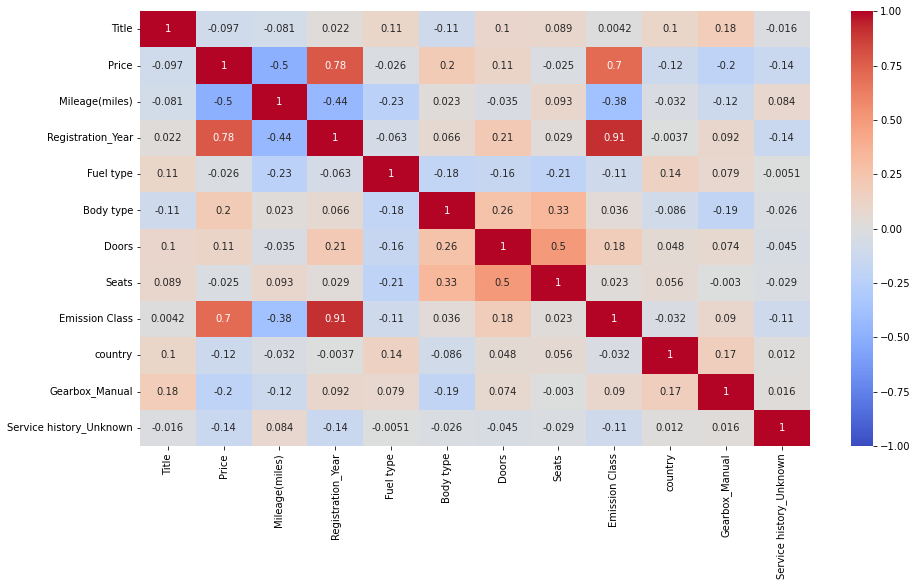

In [85]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

- 무언가 잘 못 되 었 다 
- 원핫인코딩을 전부 정수형 인코딩으로 변환 후 다시 실행하였다.

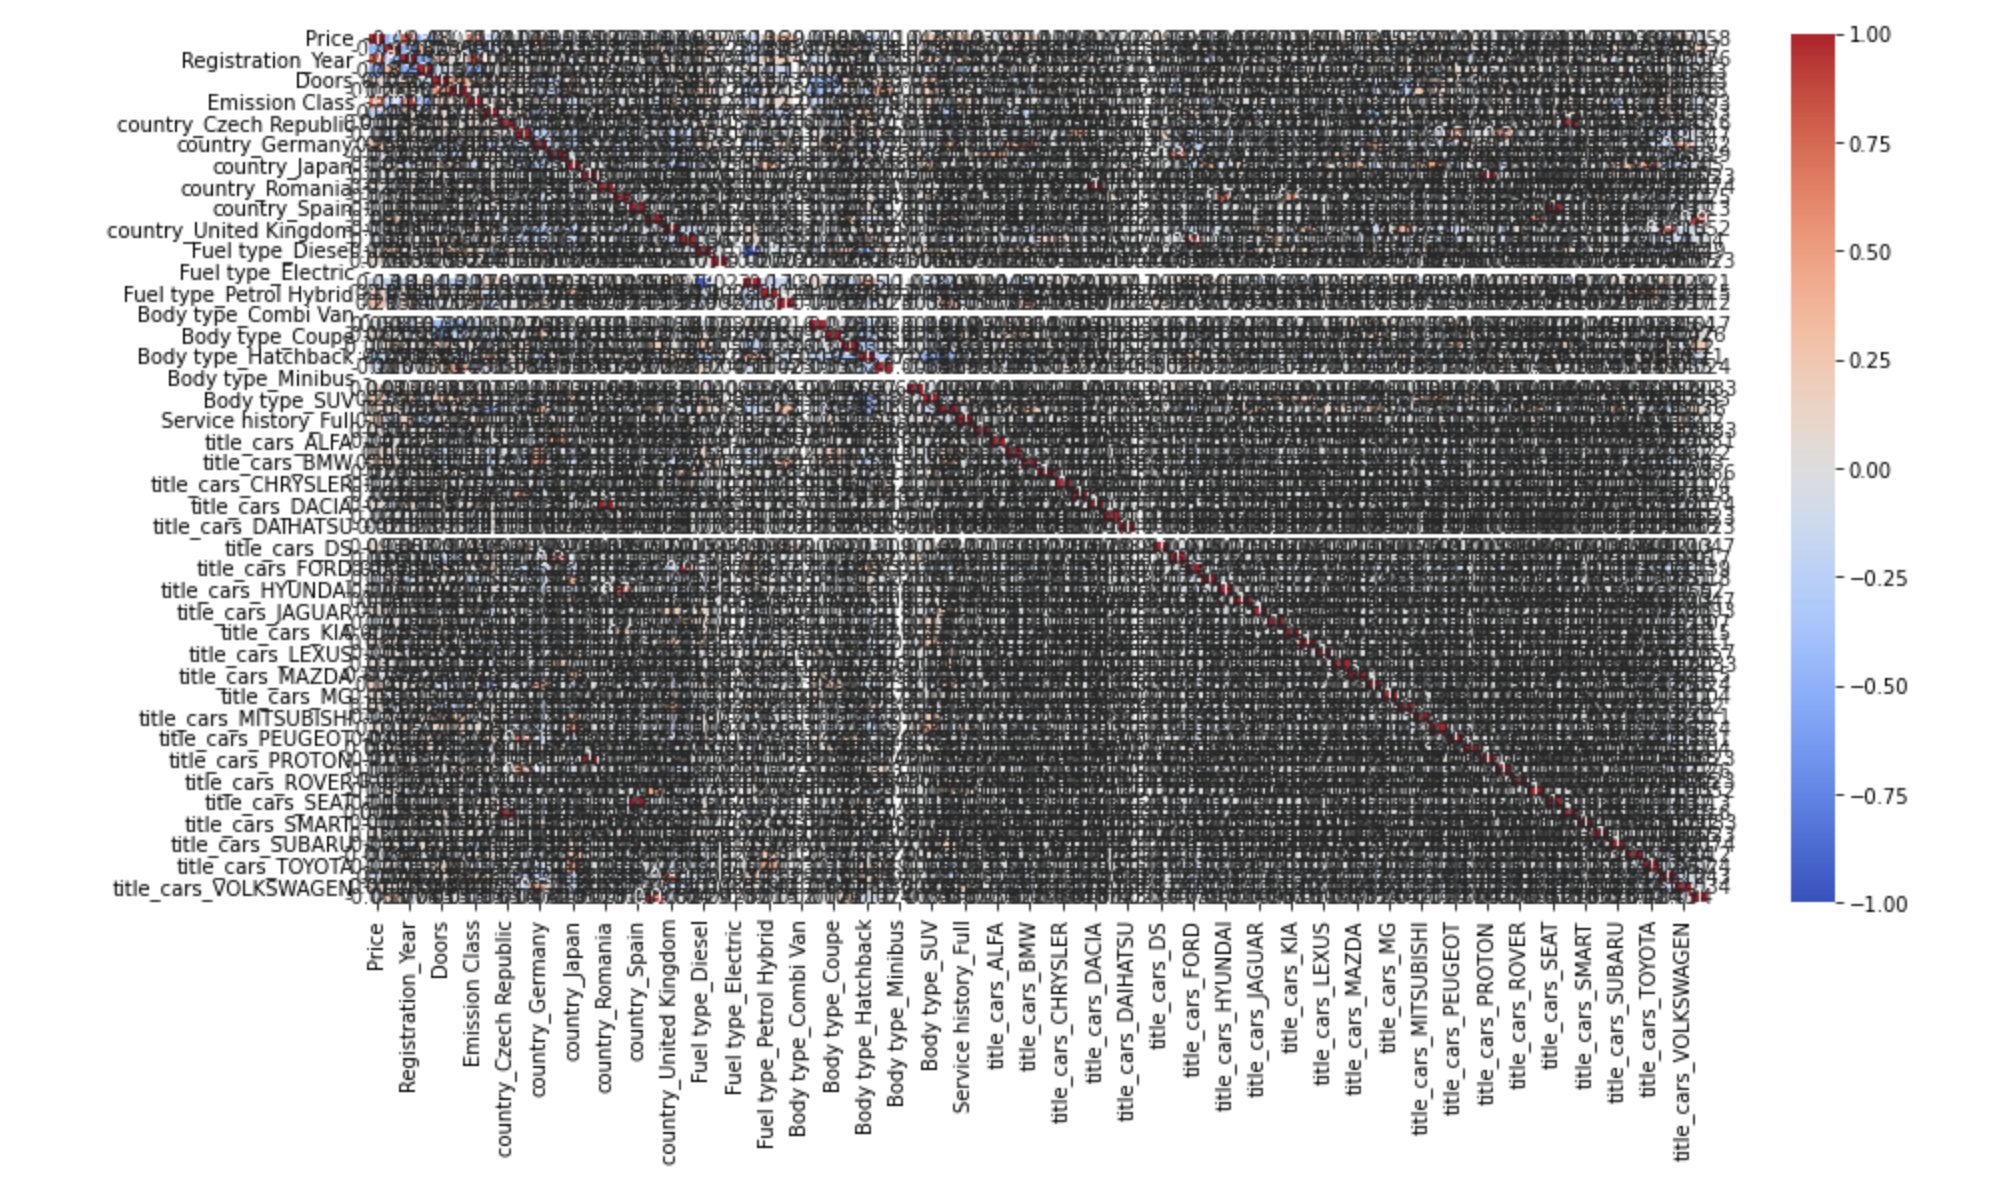
🔼 원핫인코딩으로 했을 때... 

In [86]:
df_corr = merged_.corr()

In [ ]:
df_corr.style.background_gradient()

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

# 가격예측

In [87]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [88]:
merged_model = merged.drop(columns=['Price'])

feature_names = merged_model.select_dtypes(include="number").columns
feature_names

Index(['Title', 'Mileage(miles)', 'Registration_Year', 'Fuel type',
       'Body type', 'Doors', 'Seats', 'Emission Class', 'country',
       'Gearbox_Manual', 'Service history_Unknown'],
      dtype='object')

In [89]:
label_name = "Price"
label_name

'Price'

In [90]:
X = merged_model[feature_names]
y = merged[label_name]
display(X.head(2))
display(y.head(3))
X.shape, y.shape

,Title,Mileage(miles),Registration_Year,Fuel type,Body type,Doors,Seats,Emission Class,country,Gearbox_Manual,Service history_Unknown
0,39,70189,2016,0,4,5.0,5.0,6.0,0,1,1
1,39,70189,2016,0,4,5.0,5.0,6.0,0,1,1


0    6900
1    6900
2    1990
Name: Price, dtype: int64

((3602, 11), (3602,))

In [91]:
split_count = int(merged_model.shape[0] * 0.8)
split_count

2881

In [94]:
X_train = X[:split_count].copy()
y_train = y[:split_count].copy()

X_test = X[split_count:].copy()
y_test = y[split_count:].copy()

print("* 데이터 나뉜 값들")

X_train.shape, X_test.shape, y_train.shape, y_test.shape

* 데이터 나뉜 값들


((2881, 11), (721, 11), (2881,), (721,))

In [95]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
y_predict = model.predict(X_test)
y_predict[:5]

array([3652, 2495, 8799,  945, 9149])

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = split_count,
                                                    random_state = 42)

print("* 데이터가 잘 나뉘었는지 shape 값을 통해 확인해 보세요.")

X_train.shape, X_test.shape, y_train.shape, y_test.shape

* 데이터가 잘 나뉘었는지 shape 값을 통해 확인해 보세요.


((2881, 11), (721, 11), (2881,), (721,))

In [98]:
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
y_predict[:5]

array([5495, 8295, 7000, 2395, 9290])

<AxesSubplot:>

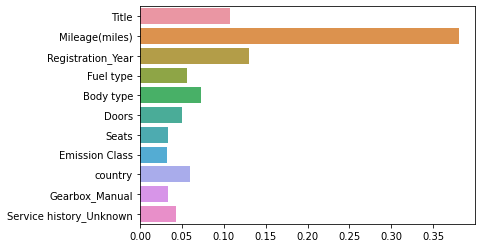

In [99]:
model.feature_importances_
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 예시: X와 y는 각각 독립변수와 종속변수에 해당하는 데이터
# X와 y 데이터는 실제 데이터에 맞게 설정해야 합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 4808952.406531508
R-squared: 0.7329704103775868


### 회고 


- 모델링 전 데이터 전처리 
    - 결측치 처리, 이상치 제거, 피처 스케일링, 범주형 변수 처리 등이 모델 성능에 영향을 끼침
    - 상관관계 높은 피처가 모델에 동시 포함되면 다중공산성 문제 발생할 수 있고 이는 모델 안정성과 해석을 어렵게 만든다   
    
    
- 좋은 모델을 위한 데이터란? 
    - 원핫인코딩의 적절한 활용   
    : 범주형 데이터를 모델이 이해할 수 있는 형태로 변환하는 중요한 단계이다. 하지만 항상 정답은 아니다.
    - 범주 개수가 많을 때 원핫인코딩을 적용하면 feature 차원이 매우 증가하기 때문이다.   
    

- 어렵다
    - 성능이 눈에 띄게 좋아질 걸 기대했는데 전처리를 왜 했나 싶은 결과가 처음에 나와서...    
        → 유연한 대처 능력을 키우고 싶다   
        → 도메인과 경험이 중요한 듯 캐글 필사 열심히 하쟝🍀(지금 내가 할 수 있는 일 !)   
    - 어떤 데이터를 찾고자, 어떤 처리를 할 지 생각해보는 게 중요하다
    - 분석하기 전 기획하고 계획하는 과정이 필요하다고 느꼈다